In [112]:
import numpy as np
import pandas as pd
from numpy.random import randn

In [113]:
from scipy import stats

In [114]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
%matplotlib inline

In [116]:
dataset1 = randn(100)

(array([ 4.,  6., 10., 10., 15., 22., 14., 11.,  4.,  4.]),
 array([-2.15580618, -1.70136904, -1.2469319 , -0.79249476, -0.33805762,
         0.11637952,  0.57081666,  1.0252538 ,  1.47969094,  1.93412808,
         2.38856522]),
 <a list of 10 Patch objects>)

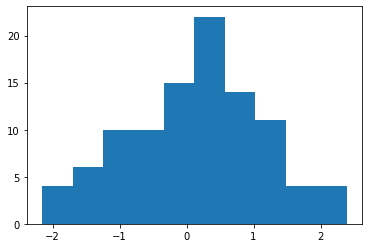

In [117]:
plt.hist(dataset1)

In [118]:
dataset2 = randn(80)

(array([ 2.,  3., 10., 15., 17., 14.,  9.,  5.,  3.,  2.]),
 array([-2.46643486, -1.90973132, -1.35302778, -0.79632424, -0.2396207 ,
         0.31708283,  0.87378637,  1.43048991,  1.98719345,  2.54389699,
         3.10060053]),
 <a list of 10 Patch objects>)

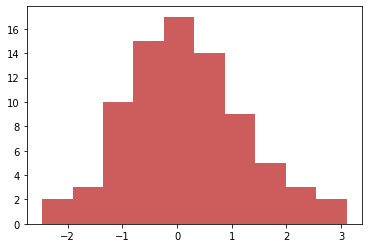

In [119]:
plt.hist(dataset2,color='indianred')

(array([0.04490721, 0.04490721, 0.04490721, 0.08981441, 0.13472162,
        0.31435044, 0.58379367, 0.08981441, 0.53888646, 0.22453603,
        0.31435044, 0.31435044, 0.13472162, 0.26944323, 0.08981441,
        0.13472162, 0.08981441, 0.04490721, 0.        , 0.08981441]),
 array([-2.46643486, -2.18808309, -1.90973132, -1.63137955, -1.35302778,
        -1.07467601, -0.79632424, -0.51797247, -0.2396207 ,  0.03873106,
         0.31708283,  0.5954346 ,  0.87378637,  1.15213814,  1.43048991,
         1.70884168,  1.98719345,  2.26554522,  2.54389699,  2.82224876,
         3.10060053]),
 <a list of 20 Patch objects>)

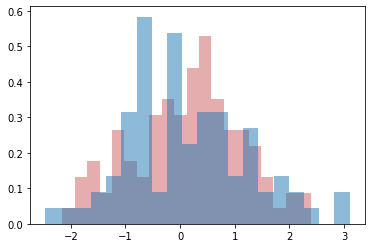

In [120]:
plt.hist(dataset1,density=True,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,density=True,alpha=0.5,bins=20)

In [121]:
data1 = randn(1000)
data2 = randn(1000)

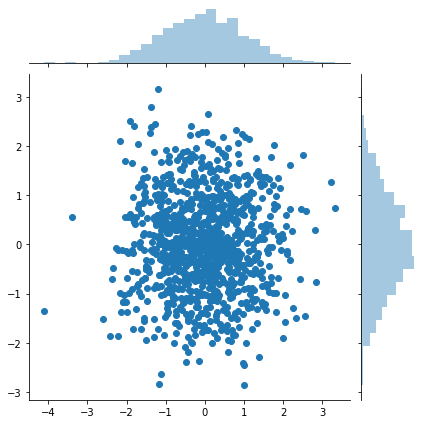

In [122]:
sns.jointplot(data1,data2)

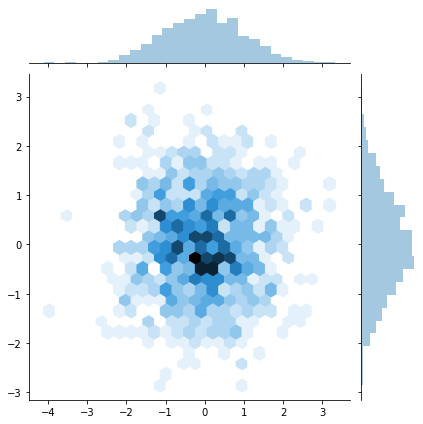

In [123]:
sns.jointplot(data1,data2,kind='hex')

In [138]:
dataset = randn(25)

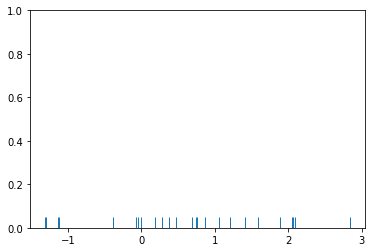

In [125]:
sns.rugplot(dataset)

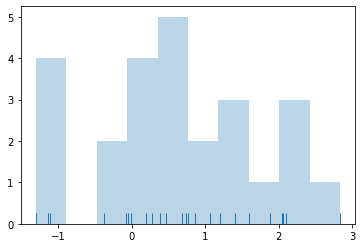

In [126]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

In [127]:
df = pd.DataFrame(dataset)

In [128]:
df.describe()

,0
count,25.000000
mean,0.606815
std,1.140302
min,-1.307453
25%,-0.047924
50%,0.686614
75%,1.407620
max,2.834698


(0, 1)

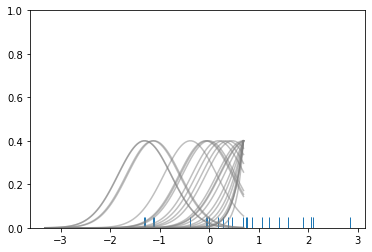

In [129]:
sns.rugplot(dataset)
x_min = dataset.min() -2
x_max = dataset.min() +2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*0.964144**5) / (3*len(dataset))) ** .2

kernel_list = []
for data_point in dataset:
    
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    
    plt.plot(x_axis,kernel,color='grey',alpha = .5)
    

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

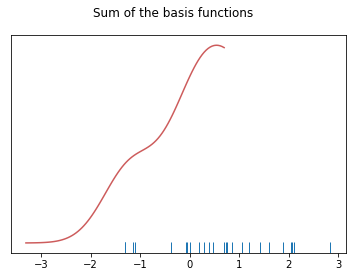

In [130]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

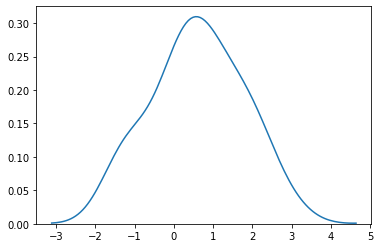

In [131]:
sns.kdeplot(dataset)

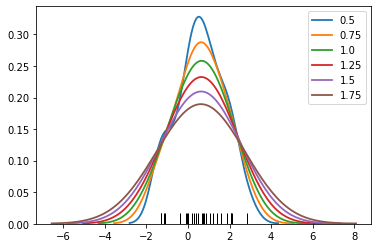

In [132]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

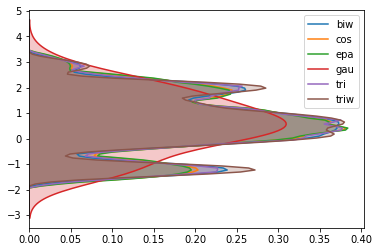

In [133]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade = True,vertical=True)

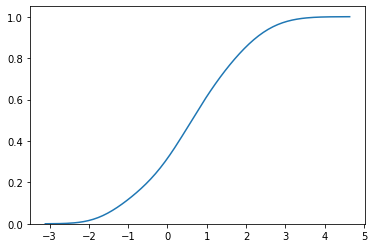

In [134]:
sns.kdeplot(dataset,cumulative = True)

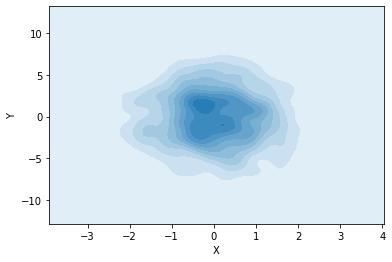

In [135]:
mean = [0,0]
cov = [[1,0],[0,11]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

df = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(df['X'],df['Y'],shade=True,bw='silverman')

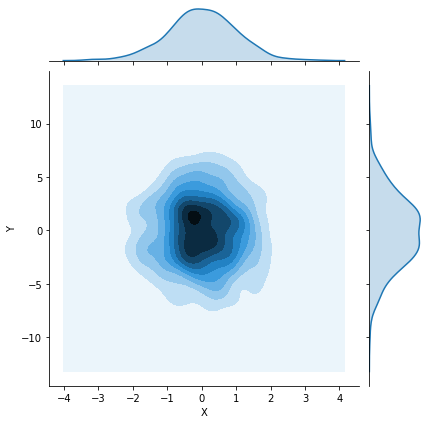

In [136]:
sns.jointplot('X','Y',df,kind='kde')

In [140]:
dataset5 = randn(100)

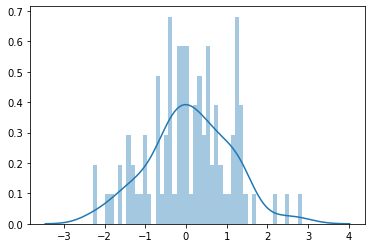

In [143]:
sns.distplot(dataset5,bins=50)

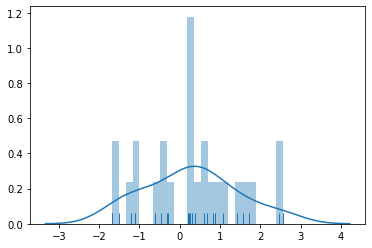

In [146]:
sns.distplot(dataset,bins=25,rug=True)

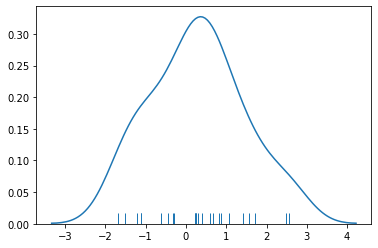

In [147]:
sns.distplot(dataset,bins=25,rug=True,hist=False)

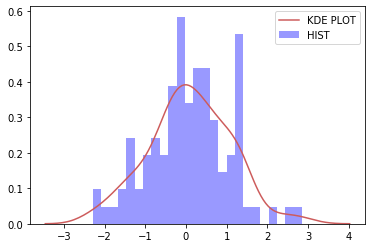

In [148]:
sns.distplot(dataset5,bins=25,
            kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'blue','label':'HIST'})

In [149]:
from pandas import Series

In [150]:
ser1 = Series(dataset5,name='My_data')

In [151]:
ser1

0     0.303151
1    -0.990914
2    -0.647366
3     0.002757
4     0.094220
        ...   
95    1.043825
96   -1.773793
97   -1.327261
98   -0.398794
99   -0.101508
Name: My_data, Length: 100, dtype: float64

In [153]:
sns.distplot(ser1,bins=25,gridlines=True)

TypeError: distplot() got an unexpected keyword argument 'gridlines'